-  Hello there 
> notebook helps need more work, possible improvements can be made

In [1]:

# Using pip to install imblearn
%pip install imblearn
%pip install missingno
%pip install category_encoders

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 10, Finished, Available, Finished)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 553.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 375.7 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [2]:
import missingno as msno
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Disable MLflow autologging to avoid tracking the SMOTE fitting
import mlflow

mlflow.autolog(disable=True)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 12, Finished, Available, Finished)

In [3]:
# Load data into pandas DataFrame from "/lakehouse/default/Files/predictive_maintenance.csv"
df = pd.read_csv("/lakehouse/default/Files/predictive_maintenance.csv")
display(df)
product_id = df.pop('Product ID')

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 13, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 422954a7-d125-4a9c-9162-b6cfd79367b2)

In [4]:
#getting description of the data
df.describe()

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 14, Finished, Available, Finished)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df.head()

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 15, Finished, Available, Finished)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df['Target'].value_counts()

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 16, Finished, Available, Finished)

Target
0    9661
1     339
Name: count, dtype: int64

In [7]:


## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)



StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 17, Finished, Available, Finished)

In [8]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 18, Finished, Available, Finished)

,UDI,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
4918,4919,L,31.15,40.05,1457,40.7,48,0,No Failure,8.9
7582,7583,H,28.25,39.05,1489,45.3,180,0,No Failure,10.8
2321,2322,M,27.05,36.65,1314,52.5,193,0,No Failure,9.6
8280,8281,L,26.65,38.45,1602,39.1,211,0,No Failure,11.8
9991,9992,M,26.75,36.25,1827,26.1,5,0,No Failure,9.5


In [9]:
import matplotlib.pyplot as plt

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 19, Finished, Available, Finished)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 20, Finished, Available, Finished)

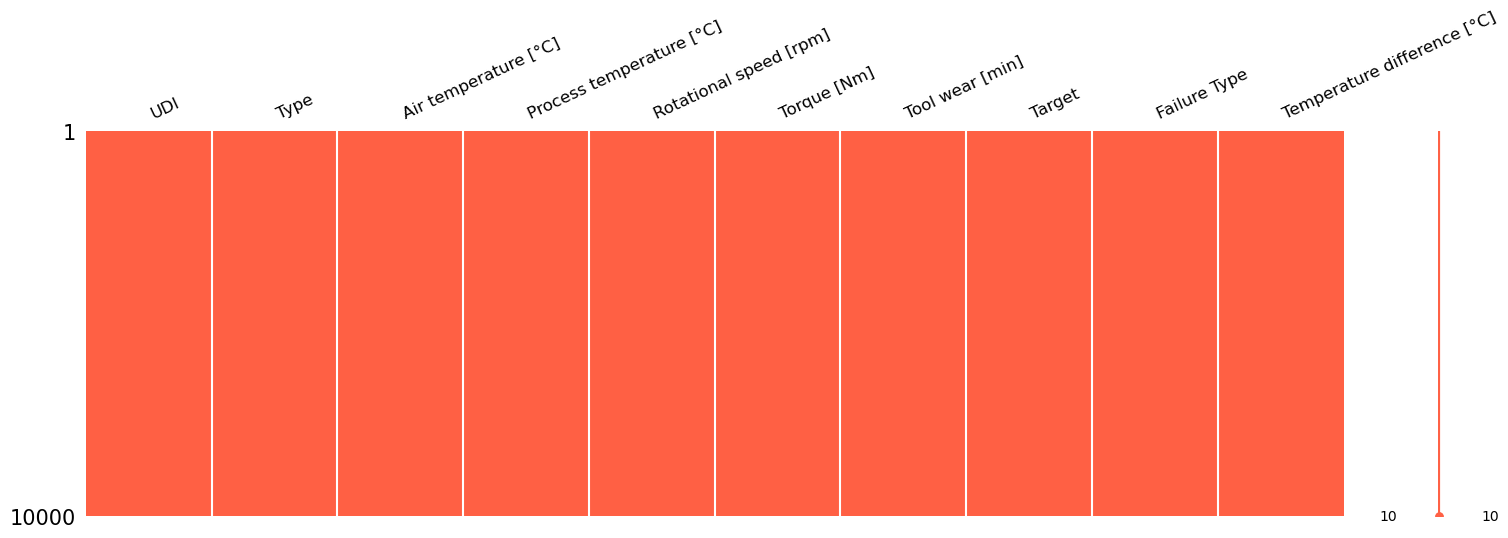

In [10]:

msno.matrix(df, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 21, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


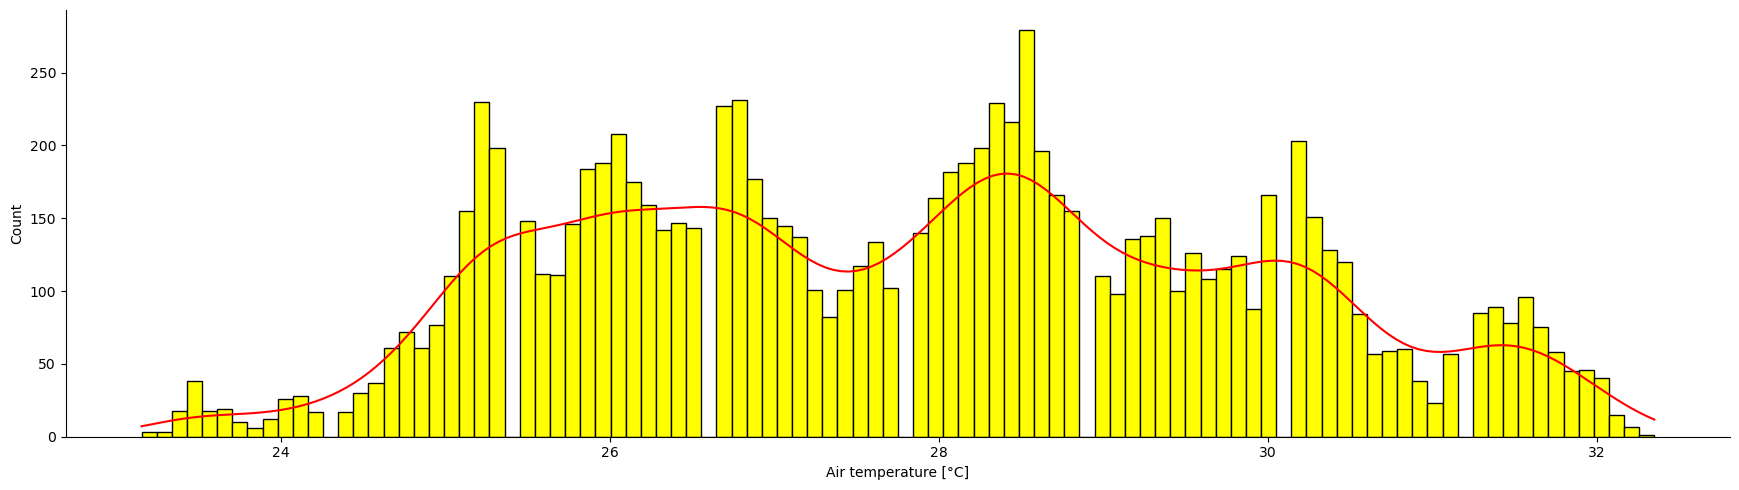

In [11]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 22, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


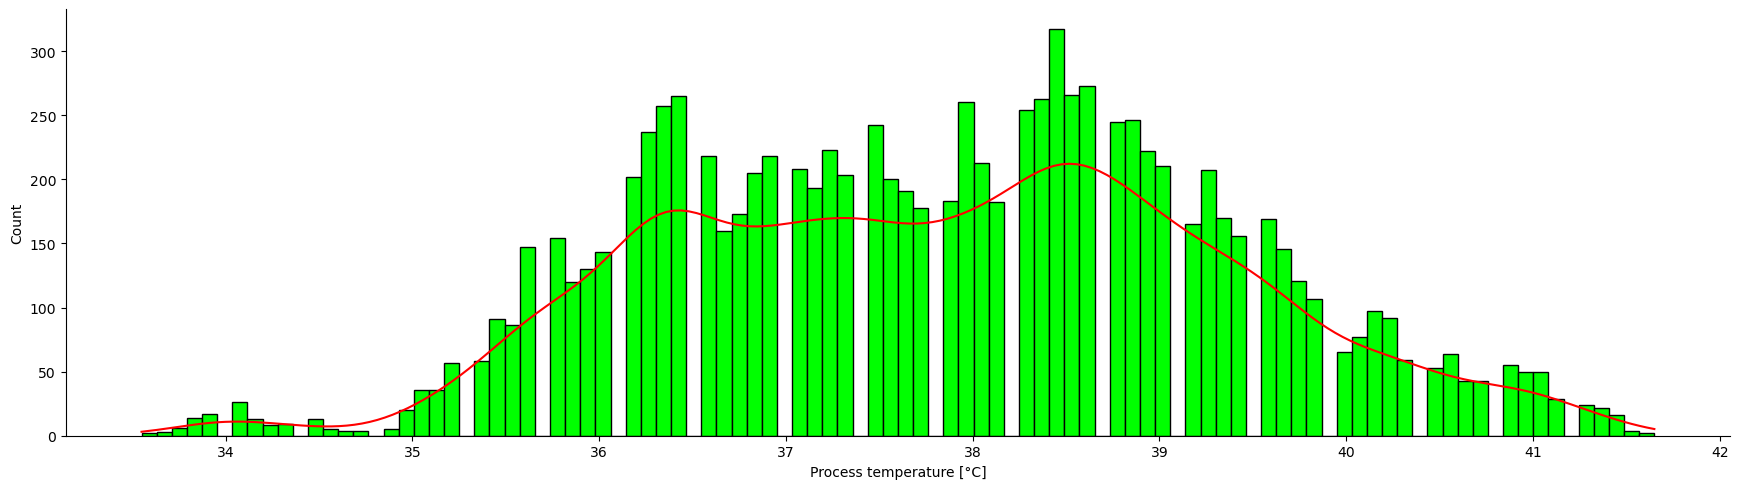

In [12]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 23, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


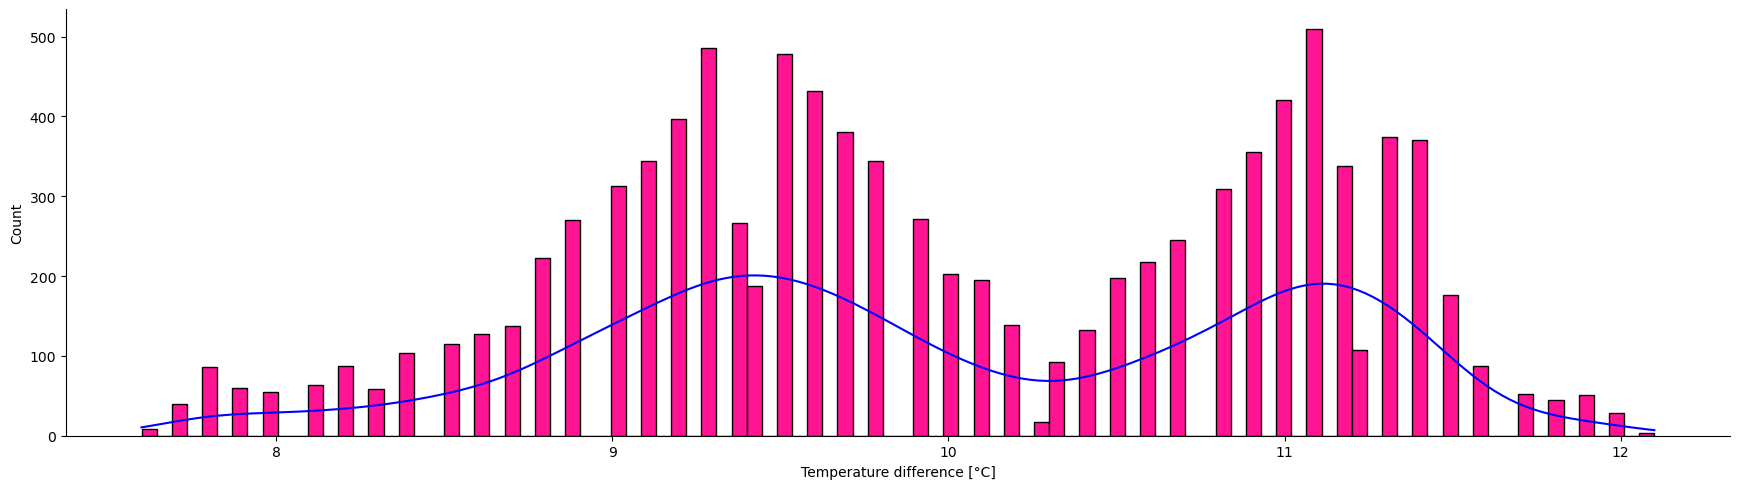

In [13]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 24, Finished, Available, Finished)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


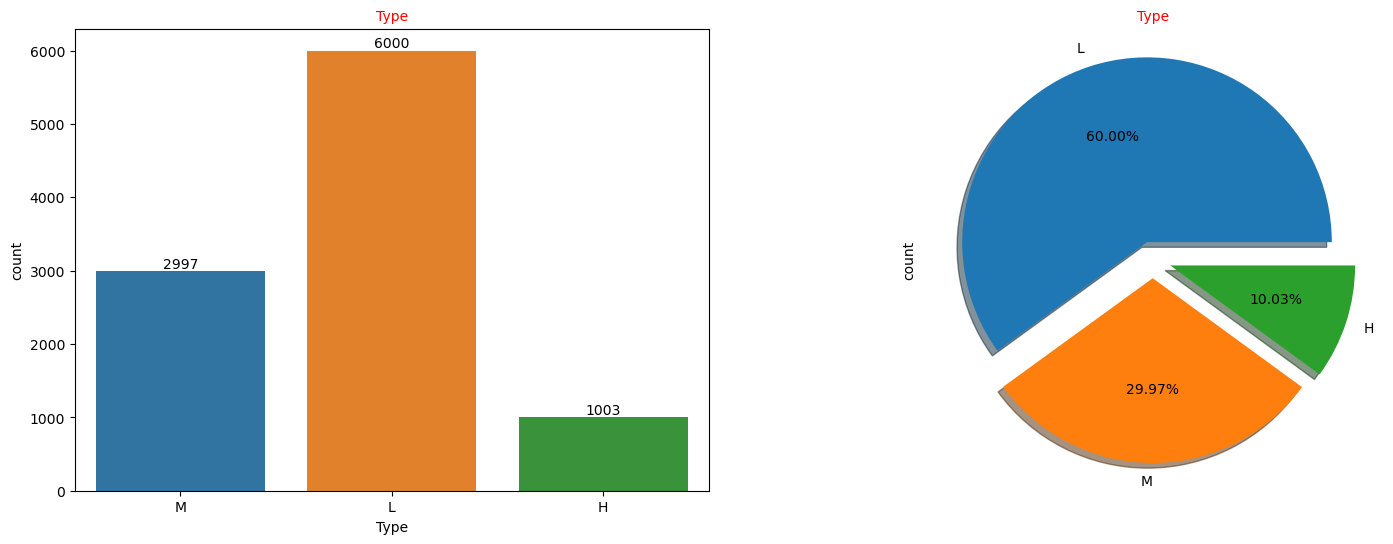

In [14]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 25, Finished, Available, Finished)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


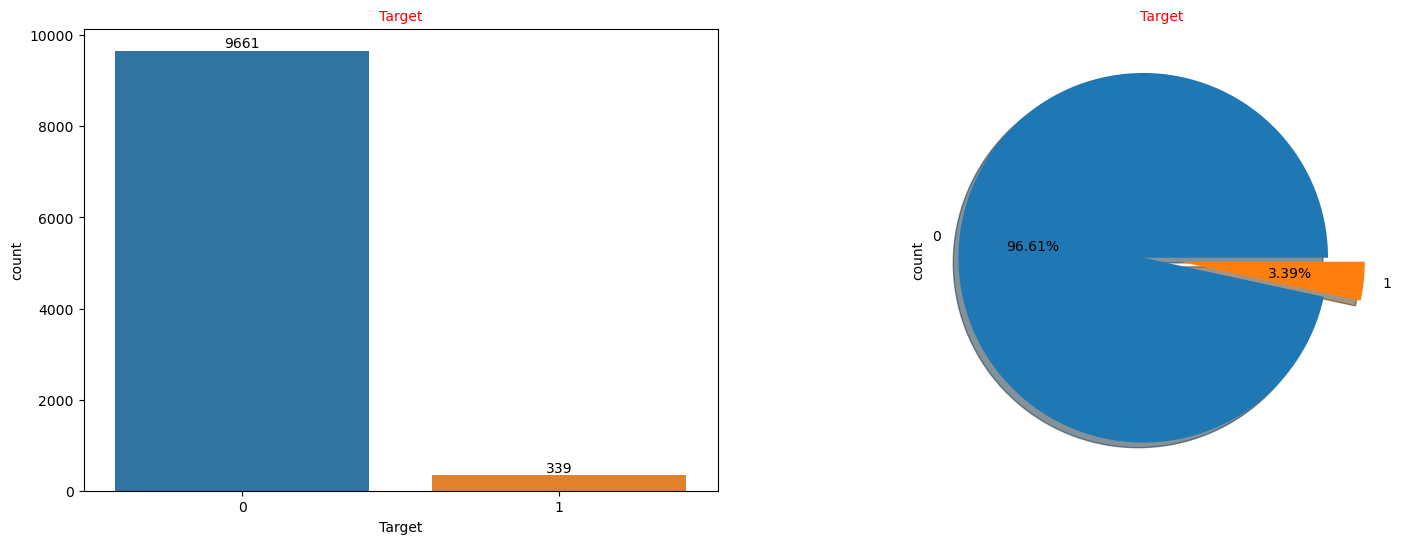

In [15]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 26, Finished, Available, Finished)

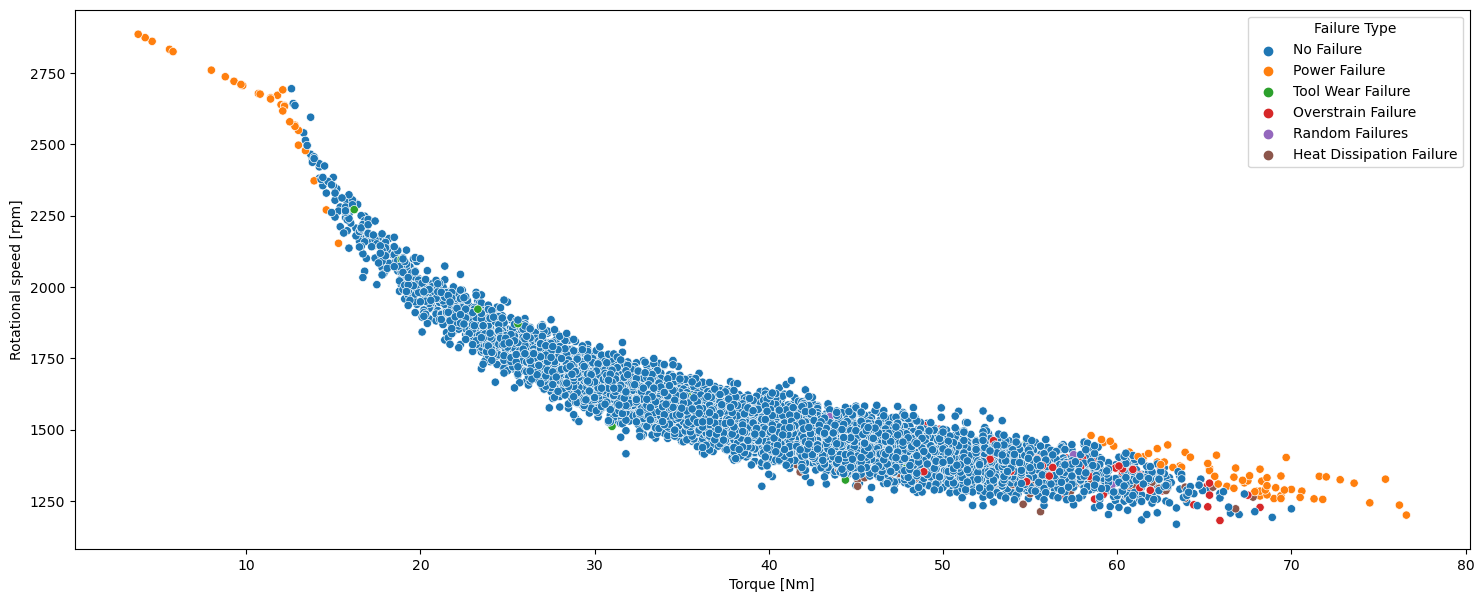

In [16]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 27, Finished, Available, Finished)

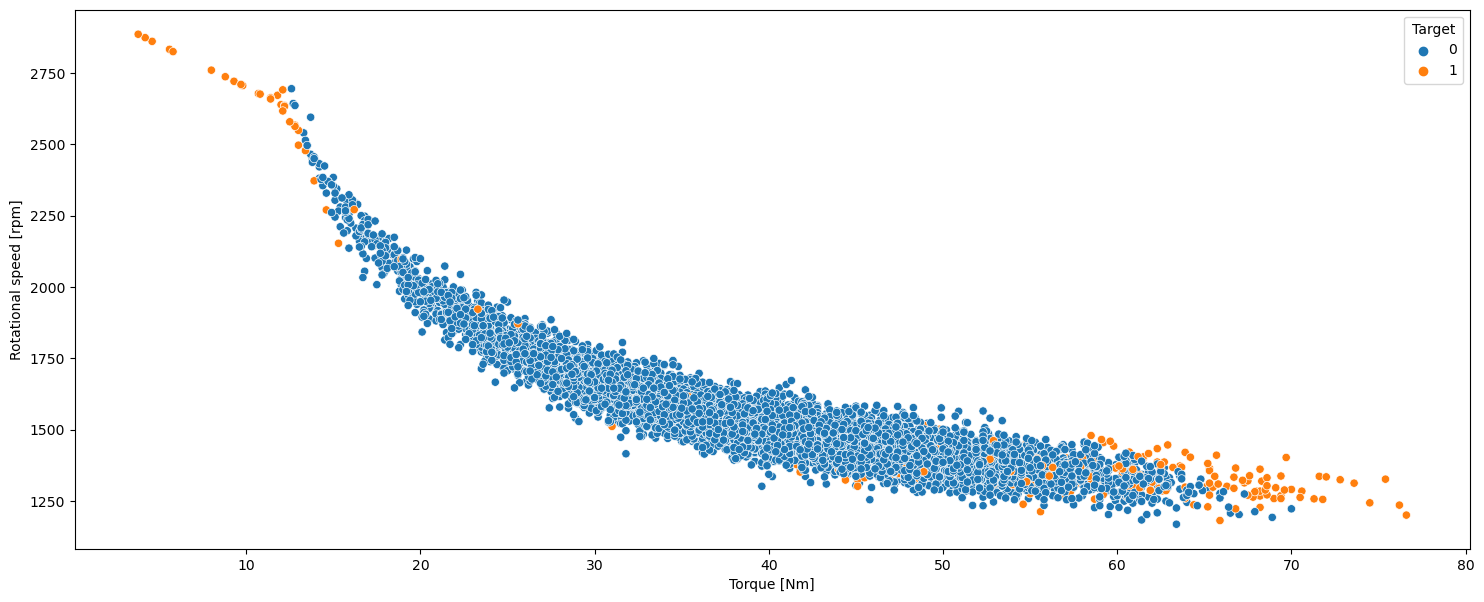

In [17]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 28, Finished, Available, Finished)

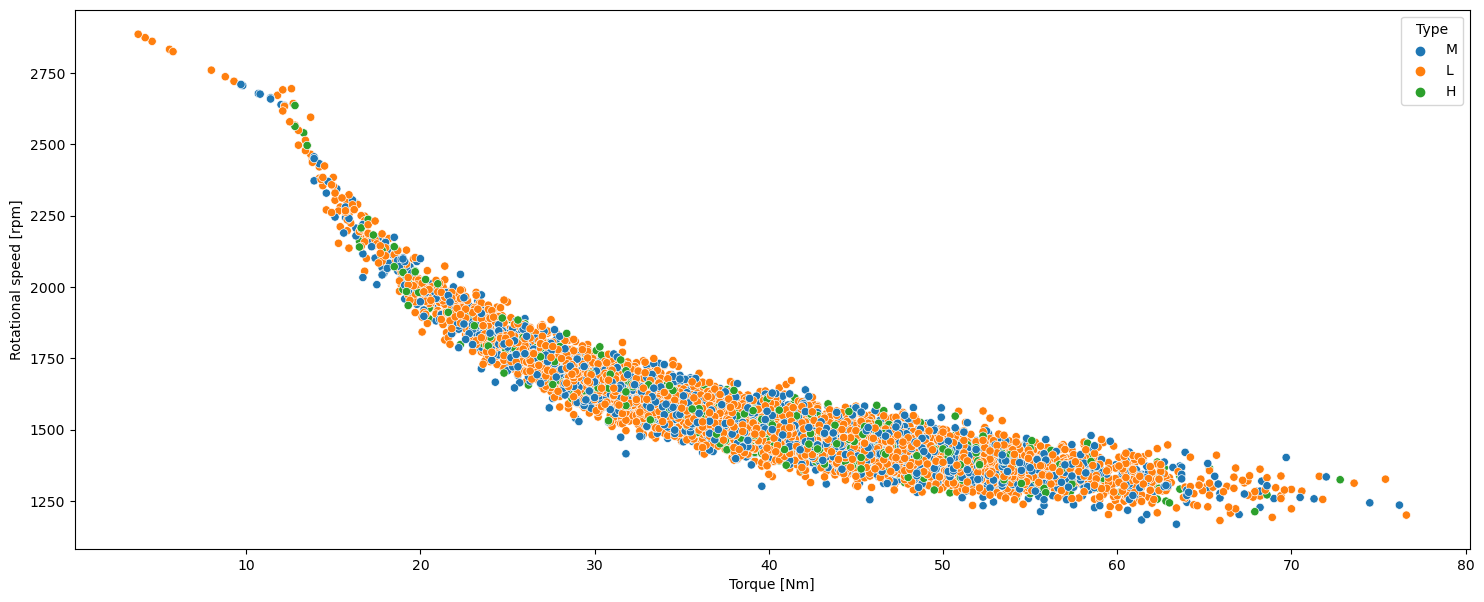

In [18]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 29, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


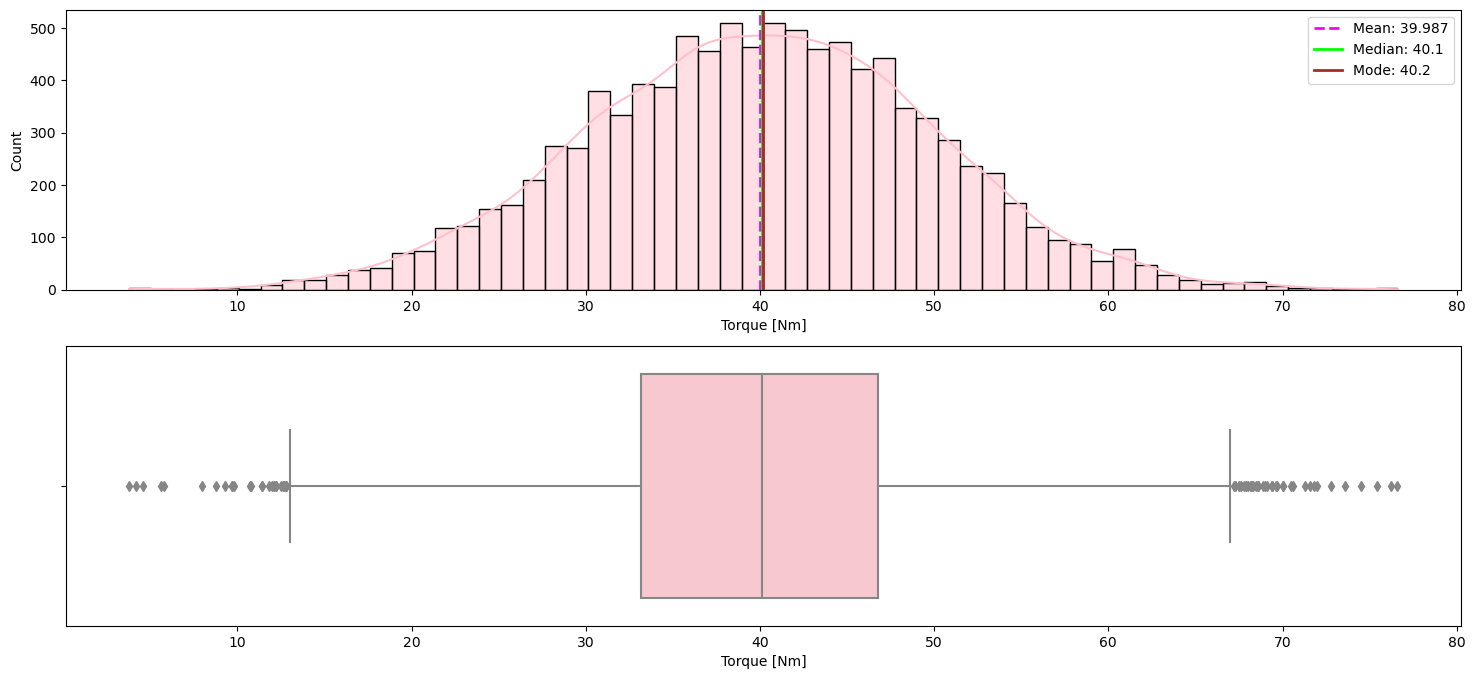

In [19]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')



StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 30, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


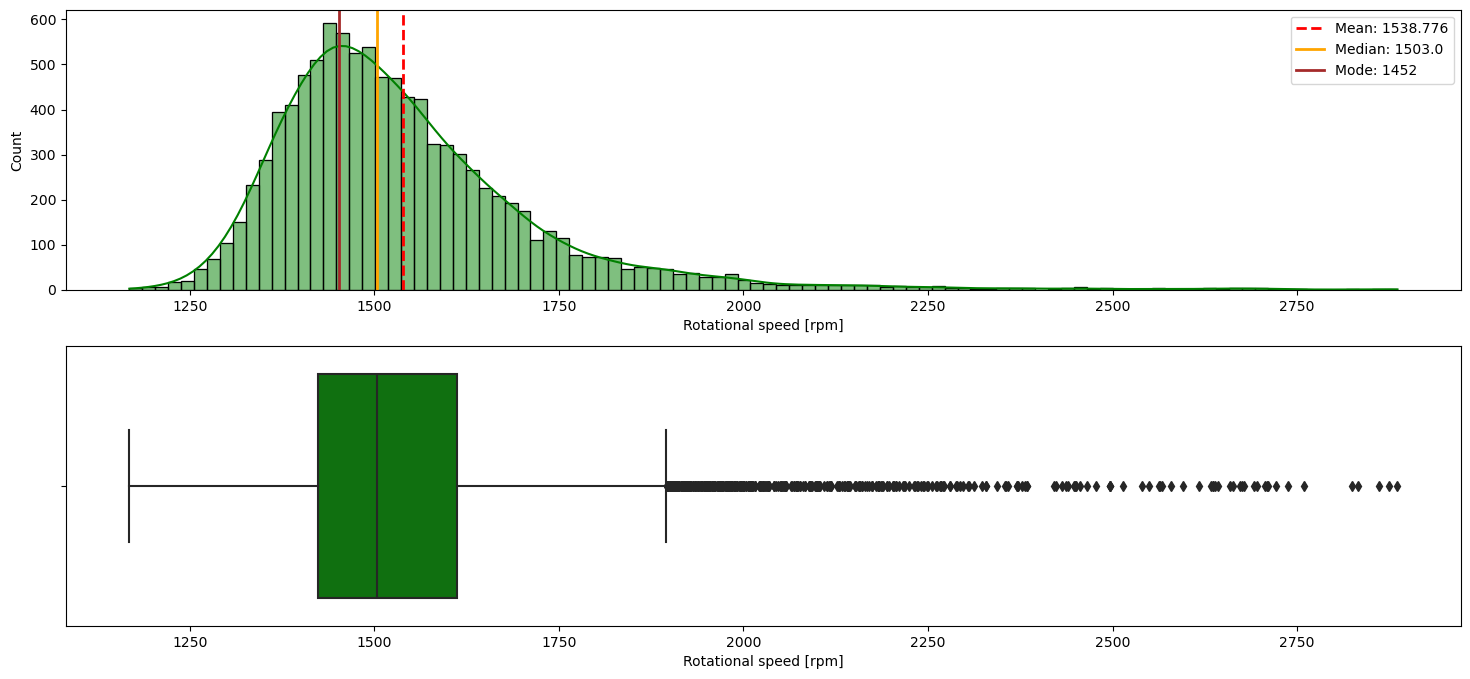

In [20]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 31, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


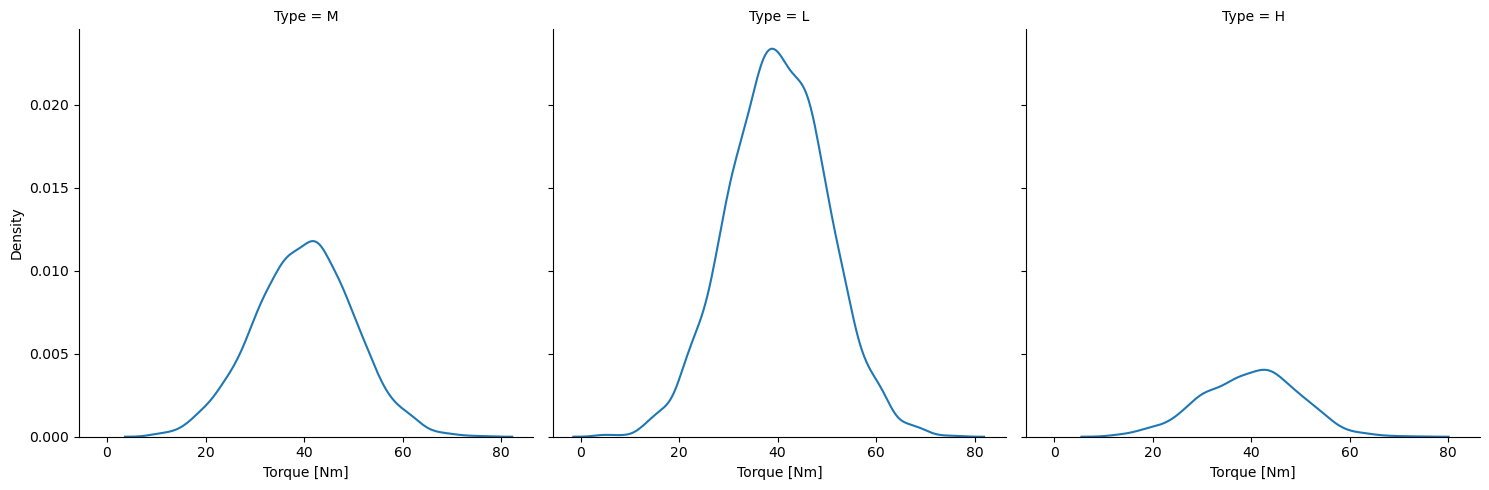

In [21]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 32, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


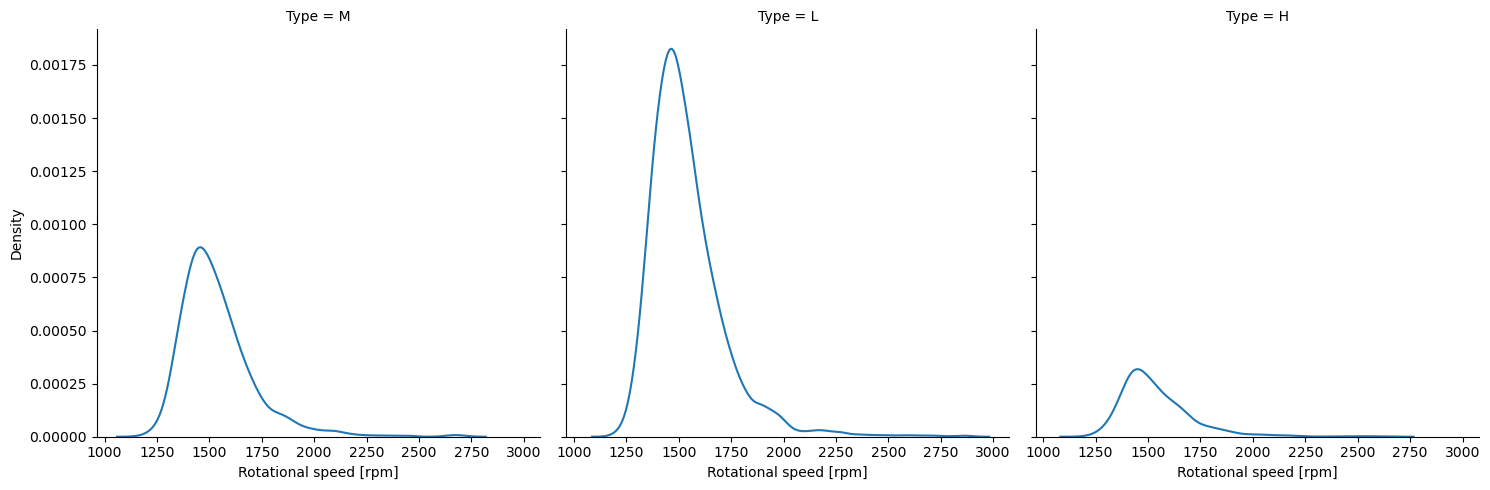

In [22]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 33, Finished, Available, Finished)

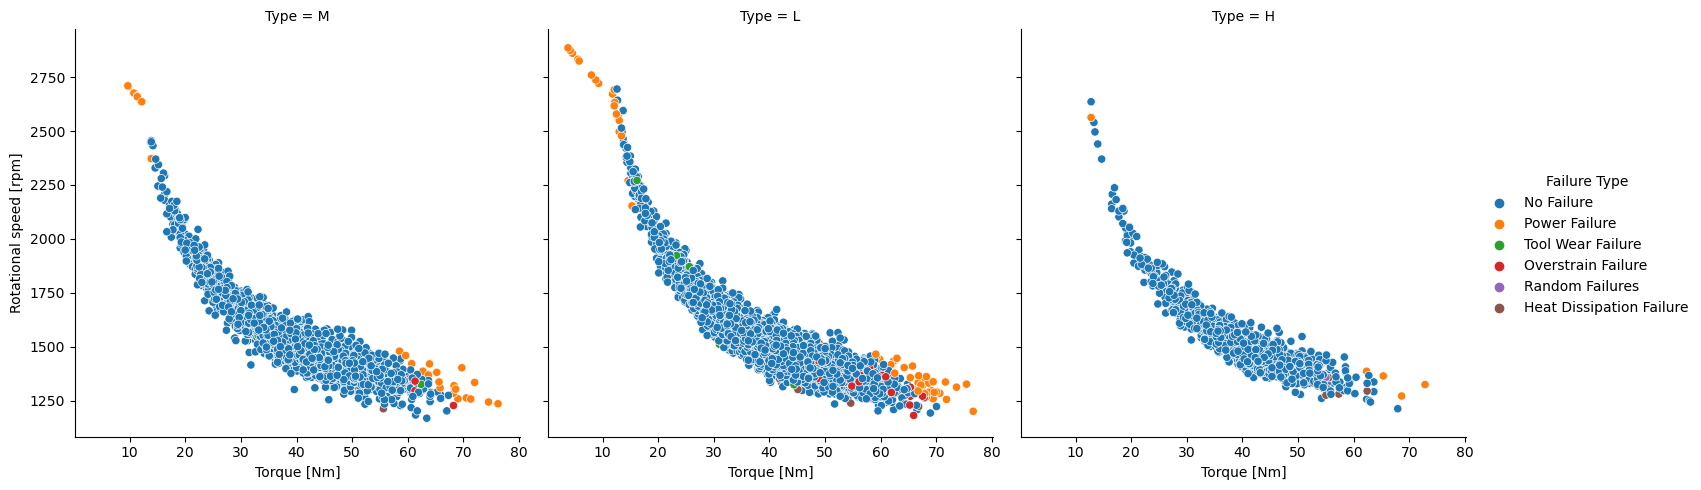

In [23]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

In [24]:
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 34, Finished, Available, Finished)

,UDI,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,2,26.05,36.55,1408,46.3,3,0,1,10.5


In [25]:
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 35, Finished, Available, Finished)

In [26]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 36, Finished, Available, Finished)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 37, Finished, Available, Finished)

In [28]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 38, Finished, Available, Finished)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 39, Finished, Available, Finished)

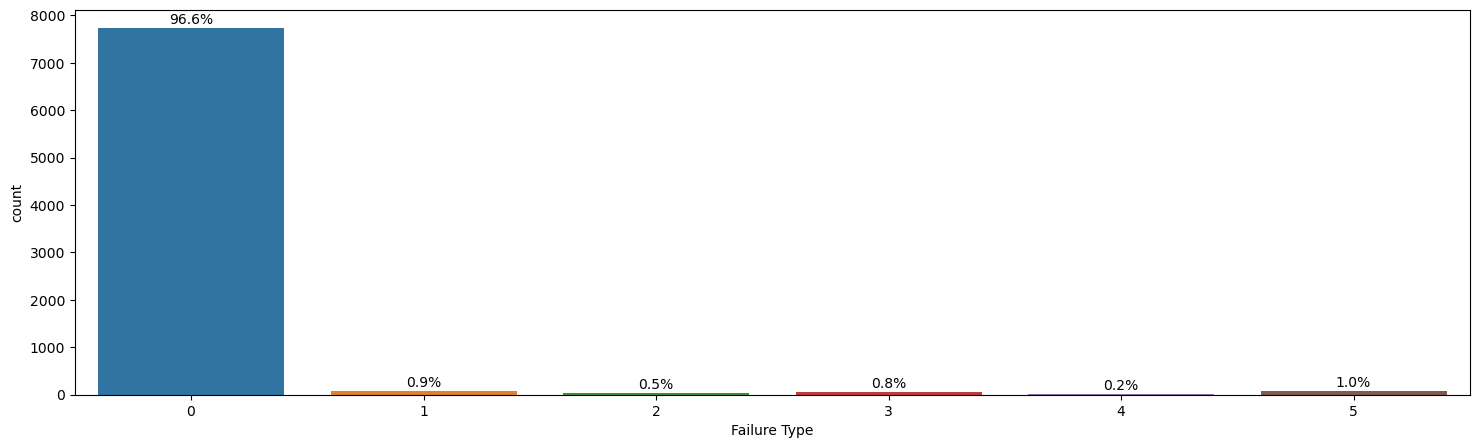

In [29]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 40, Finished, Available, Finished)

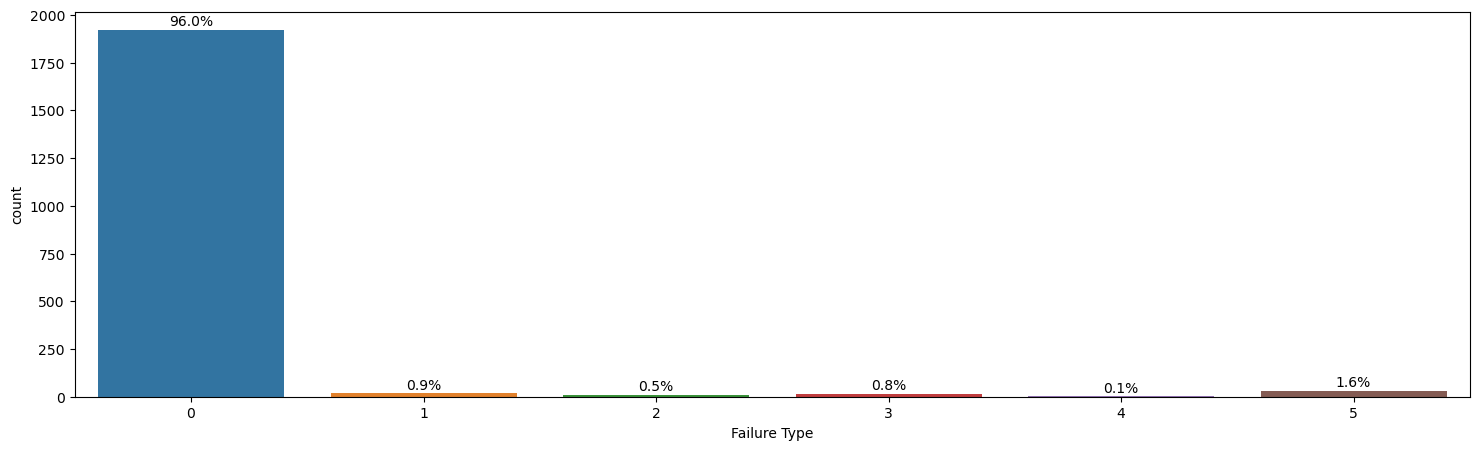

In [30]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [31]:
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from mlflow.models.signature import infer_signature
from sklearn.metrics import f1_score, accuracy_score, recall_score

mlflow.set_experiment("Machine_Failure_Classification")
mlflow.autolog(exclusive=False) # Override the pre-configured autologging behavior

with mlflow.start_run() as run:
    rfc_id = run.info.run_id
    print(f"run_id {rfc_id}, status: {run.info.status}")
    rfc = RandomForestClassifier(max_depth=5, n_estimators=50)
    rfc.fit(X_train_res, y_train_res) 
    signature = infer_signature(X_train_res, y_train_res)

    mlflow.sklearn.log_model(
        rfc,
        "machine_failure_model_rf",
        signature=signature,
        registered_model_name="machine_failure_model_rf"
    ) 

    y_pred_train = rfc.predict(X_train)
    # Calculate the classification metrics for test data
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    accuracy_train = accuracy_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train, average='weighted')

    # Log the classification metrics to MLflow
    mlflow.log_metric("f1_score_train", f1_train)
    mlflow.log_metric("accuracy_train", accuracy_train)
    mlflow.log_metric("recall_train", recall_train)

    # Print the run ID and the classification metrics
    print("F1 score_train:", f1_train)
    print("Accuracy_train:", accuracy_train)
    print("Recall_train:", recall_train)    

    y_pred_test = rfc.predict(X_test)
    # Calculate the classification metrics for test data
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    # Log the classification metrics to MLflow
    mlflow.log_metric("f1_score_test", f1_test)
    mlflow.log_metric("accuracy_test", accuracy_test)
    mlflow.log_metric("recall_test", recall_test)

    # Print the classification metrics
    print("F1 score_test:", f1_test)
    print("Accuracy_test:", accuracy_test)
    print("Recall_test:", recall_test)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 41, Finished, Available, Finished)

2024/11/11 13:22:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/11/11 13:22:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/11/11 13:22:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest

run_id 441542a6-2691-4aa9-99f4-aee4d562869e, status: RUNNING
F1 score_train: 0.7996620041068963
Accuracy_train: 0.671625
Recall_train: 0.671625
F1 score_test: 0.7989991359084261
Accuracy_test: 0.6705
Recall_test: 0.6705


In [32]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run() as run:
    lr_id = run.info.run_id
    print(f"run_id {lr_id}, status: {run.info.status}")
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train_res, y_train_res)
    signature = infer_signature(X_train_res, y_train_res)
  
    mlflow.sklearn.log_model(
        lr,
        "machine_failure_model_lr",
        signature=signature,
        registered_model_name="machine_failure_model_lr"
    ) 

    y_pred_train = lr.predict(X_train)
    # Calculate the classification metrics for train data
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    accuracy_train = accuracy_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train, average='weighted')

    # Log the classification metrics to MLflow
    mlflow.log_metric("f1_score_train", f1_train)
    mlflow.log_metric("accuracy_train", accuracy_train)
    mlflow.log_metric("recall_train", recall_train)

    # Print the run ID and the classification metrics
    print("F1 score_train:", f1_train)
    print("Accuracy_train:", accuracy_train)
    print("Recall_train:", recall_train)    

    y_pred_test = lr.predict(X_test)
    # Calculate the classification metrics for test data
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    # Log the classification metrics to MLflow
    mlflow.log_metric("f1_score_test", f1_test)
    mlflow.log_metric("accuracy_test", accuracy_test)
    mlflow.log_metric("recall_test", recall_test)


StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 42, Finished, Available, Finished)

run_id f4f999db-0e75-4ae0-b27f-a4f1fef5f589, status: RUNNING
F1 score_train: 0.5794715605105714
Accuracy_train: 0.429625
Recall_train: 0.429625


2024/11/11 13:23:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: Co

In [33]:
from xgboost import XGBClassifier

with mlflow.start_run() as run:
    xgb = XGBClassifier()
    xgb_id = run.info.run_id 
    print(f"run_id {xgb_id}, status: {run.info.status}")
    xgb.fit(X_train_res.to_numpy(), y_train_res.to_numpy()) 
    signature = infer_signature(X_train_res, y_train_res)
  
    mlflow.xgboost.log_model(
        xgb,
        "machine_failure_model_xgb",
        signature=signature,
        registered_model_name="machine_failure_model_xgb"
    ) 

    y_pred_train = xgb.predict(X_train)
    # Calculate the classification metrics for train data
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    accuracy_train = accuracy_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train, average='weighted')

    # Log the classification metrics to MLflow
    mlflow.log_metric("f1_score_train", f1_train)
    mlflow.log_metric("accuracy_train", accuracy_train)
    mlflow.log_metric("recall_train", recall_train)

    # Print the run ID and the classification metrics
    print("F1 score_train:", f1_train)
    print("Accuracy_train:", accuracy_train)
    print("Recall_train:", recall_train)    

    y_pred_test = xgb.predict(X_test)
    # Calculate the classification metrics for test data
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    # Log the classification metrics to MLflow
    mlflow.log_metric("f1_score_test", f1_test)
    mlflow.log_metric("accuracy_test", accuracy_test)
    mlflow.log_metric("recall_test", recall_test)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 43, Finished, Available, Finished)

2024/11/11 13:23:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/11/11 13:23:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [13:23:32] WARNING: /croot/xgboost-split_1713972711803/work/cpp_src/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realis

run_id e974cf77-a9da-4f7e-8549-3197e9e6d00a, status: RUNNING
F1 score_train: 0.9997577963292368
Accuracy_train: 0.99975
Recall_train: 0.99975


In [34]:
runs = {'random forest classifer':   rfc_id,
        'logistic regression classifier': lr_id,
        'xgboost classifier': xgb_id}

# Create an empty list to hold the metrics
df_metrics = []

# Loop through the run IDs and retrieve the metrics for each run
for run_name, run_id in runs.items():
    metrics = mlflow.get_run(run_id).data.metrics
    metrics["run_name"] = run_name
    df_metrics.append(metrics)

# Convert the list to DataFrame
df_metrics = pd.DataFrame(df_metrics)

# Print the DataFrame
print(df_metrics)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 44, Finished, Available, Finished)

   training_recall_score  training_roc_auc  training_precision_score  \
0               0.927442          0.996631                  0.942196   
1               0.564178          0.831165                  0.535601   
2                    NaN               NaN                       NaN   

   training_log_loss  training_accuracy_score  training_score  \
0           0.254955                 0.927442        0.927442   
1           1.222127                 0.564178        0.564178   
2                NaN                      NaN             NaN   

   training_f1_score  f1_score_train  accuracy_train  recall_train  \
0           0.925862        0.799662        0.671625      0.671625   
1           0.521503        0.579472        0.429625      0.429625   
2                NaN        0.999758        0.999750      0.999750   

   f1_score_test  accuracy_test  recall_test                        run_name  
0       0.798999         0.6705       0.6705         random forest classifer  
1       0.5

In [35]:
from synapse.ml.predict import MLFlowTransformer

model = MLFlowTransformer(
    inputCols=list(X_test.columns),
    outputCol='predictions',
    modelName='machine_failure_model_rf',
    modelVersion=1
)

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 45, Finished, Available, Finished)

2024/11/11 13:23:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.


/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/functions.py:407: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.


In [36]:
predictions = model.transform(spark.createDataFrame(X_test))
predictions.show()

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 46, Finished, Available, Finished)

+----+----+--------------------+------------------------+----------------------+-----------+---------------+------+---------------------------+-----------+
| UDI|Type|Air temperature [°C]|Process temperature [°C]|Rotational speed [rpm]|Torque [Nm]|Tool wear [min]|Target|Temperature difference [°C]|predictions|
+----+----+--------------------+------------------------+----------------------+-----------+---------------+------+---------------------------+-----------+
|3645|   2|   30.05000000000001|       39.35000000000002|                  1548|       32.4|             81|     0|          9.300000000000011|          0|
|1829|   2|  25.650000000000034|       35.05000000000001|                  1351|       56.3|            174|     0|          9.399999999999977|          0|
|6662|   1|  29.150000000000034|                   38.25|                  1501|       39.8|            187|     0|          9.099999999999966|          4|
|9217|   3|   25.55000000000001|      36.650000000000034|       

In [38]:
# Save test data to lakehouse for use in future
table_name = "pred_maint_test_predictions"
predictions.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark dataframe saved to delta table: {table_name}")

StatementMeta(, 1d21c111-7dd0-4a51-8cb5-bb036ae18007, 48, Finished, Available, Finished)

AnalysisException: [DELTA_INVALID_CHARACTERS_IN_COLUMN_NAMES] Found invalid character(s) among ' ,;{}()\n\t=' in the column names of your schema.
Invalid column names: Air temperature [°C].
Please use other characters and try again.
Alternatively, enable Column Mapping to keep using these characters.